# Data Augmentation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Augmentation</a></span><ul class="toc-item"><li><span><a href="#Read-sample-data" data-toc-modified-id="Read-sample-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read sample data</a></span></li><li><span><a href="#horizontal-and-vertical-random-flips" data-toc-modified-id="horizontal-and-vertical-random-flips-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>horizontal and vertical random flips</a></span></li></ul></li></ul></div>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import sys
sys.path.insert(0,"./src")
import mynnet7 as nn
import pickle
import mxnet as mx
from imports import *
import cv2

In [6]:
x_mean=0.28
x_std = .28
bs =1

## Read sample data

In [7]:
interm_dir4='/home/mas/x110/Datasets/Dataset5/' 
s = "2018_11_06"
train_data_path=interm_dir4+'processed/train'+s+'.rec'
train_idx_path=interm_dir4+'processed/train'+s+'.idx'

In [8]:
BATCH_SIZE=bs
train_iter=nn.FileIter(train_data_path,train_idx_path,batch_size=BATCH_SIZE,do_augment=False,mean_image=x_mean,std_image = x_std,random_flip=True,do_shuffle = False)
input_shapes = dict(train_iter.provide_data+train_iter.provide_label)
print(input_shapes)

{'softmax_label': (1, 32768), 'data': (1, 1, 32, 32, 32)}


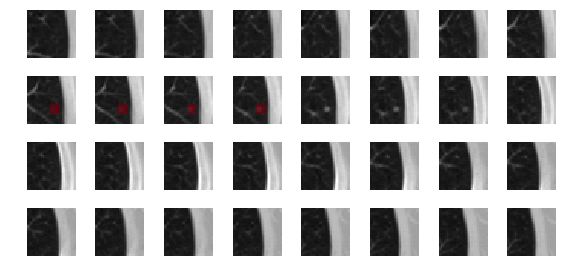

In [23]:
train_iter.reset()

batch = train_iter.next()

img = batch.data[0].asnumpy()
label= batch.label[0].asnumpy().reshape(1,32,32,32)

X = img[0][0]
X.shape

Y = label[0]
Y.shape

img = X*x_std+x_mean
msk1 = Y
msk1= np.ma.masked_where(msk1 == 0, msk1)

zs=32
num_rows=np.ceil(zs/8).astype(int)
f, plots = plt.subplots(num_rows, 8, sharex='col', sharey='row', figsize=(8,4))
for i in range(zs):
    plots[i // 8, i % 8].axis('off')
    plots[i // 8, i % 8].imshow(img[i], 'gray',vmin=0,vmax=1)
    plots[i // 8, i % 8].imshow(msk1[i],interpolation='none', cmap=plt.cm.Reds, alpha=.7, vmin=0, vmax=1)


      
plt.tight_layout()